In [204]:
%pip install seaborn

**Week 3 - Churn Prediction for StreamWorks Media - Andrea Aguirre**

Task 1. Load & Explore the Data

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# Use pandas to load the dataset
data = pd.read_csv('streamworks_user_data.csv')
print(data)

      user_id   age  gender signup_date last_active_date  country  \
0      1001.0  56.0   Other    02-04-25         13-07-25   France   
1      1002.0  69.0    Male    02-01-23         13-07-25    India   
2      1003.0  46.0    Male    21-08-22         13-07-25       UK   
3      1004.0  32.0   Other    14-09-23         13-07-25  Germany   
4      1005.0  60.0  Female    29-07-23         13-07-25    India   
...       ...   ...     ...         ...              ...      ...   
1495   2496.0  40.0  Female    26-11-23         13-07-25   Canada   
1496   2497.0  54.0    Male    12-02-25         13-07-25      USA   
1497   2498.0  28.0   Other    01-03-23         13-07-25       UK   
1498   2499.0  23.0  Female    24-10-22         13-07-25      USA   
1499   2500.0  35.0   Other    26-01-23         13-07-25   Canada   

     subscription_type  average_watch_hours  mobile_app_usage_pct  \
0             Standard                 42.6                  77.4   
1                Basic           

In [206]:
# Use .info(), .describe(), .value_counts(), .isnull().sum() to understand structure and missing values
# Data Structure
print("Data Structure:")
print(data.info())

# Summary statistics
print("Summary Statistics:")
print(data.describe())

# Frequency count
print("Summary Statistics:")
print(data.value_counts())

# Missing values
print("Missing Values:")
print(data.isnull().sum())

Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 123.1+ KB
None
Su

Feature Correlations with Monthly Sales:
age: -0.002
monthly_fee: 1.000
average_watch_hours: -0.021
mobile_app_usage_pct: 0.022
complaints_raised: -0.033
is_churned: -0.024



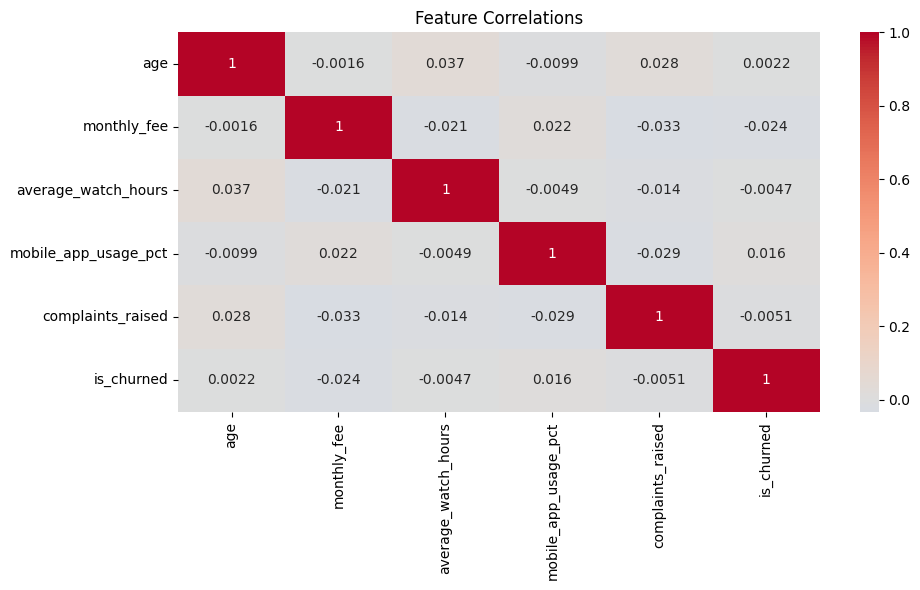

In [246]:
# Check correlations
print("Feature Correlations with Monthly Sales:")
features = ['age','monthly_fee','average_watch_hours','mobile_app_usage_pct','complaints_raised','is_churned']
for feature in features:
    corr = data[feature].corr(data['monthly_fee'])
    print(f"{feature}: {corr:.3f}")
print()

# Create correlation matrix
corr_matrix = data[features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')  # Set title directly
plt.tight_layout()
plt.show()

Task 2. Clean & Prepare the Data

In [208]:
# Convert signup_date to datetime
data['signup_date'] = pd.to_datetime(data['signup_date'])
print(data['signup_date'])

# Convert last_active_date to datetime
data['last_active_date'] = pd.to_datetime(data['last_active_date'])
print(data['last_active_date'])

<ipython-input-208-ecbef24d40bc>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['signup_date'] = pd.to_datetime(data['signup_date'])


0      2025-02-04
1      2023-02-01
2      2022-08-21
3      2023-09-14
4      2023-07-29
          ...    
1495   2023-11-26
1496   2025-12-02
1497   2023-01-03
1498   2022-10-24
1499   2023-01-26
Name: signup_date, Length: 1500, dtype: datetime64[ns]
0      2025-07-13
1      2025-07-13
2      2025-07-13
3      2025-07-13
4      2025-07-13
          ...    
1495   2025-07-13
1496   2025-07-13
1497   2025-07-13
1498   2025-07-13
1499   2025-07-13
Name: last_active_date, Length: 1500, dtype: datetime64[ns]


In [209]:
# Create new features:
# tenure_days = days between signup and last_active_date
data['tenure_days'] = (data['last_active_date'] - data['signup_date']).dt.days

# is_loyal = tenure_days > 180
data['is_loyal'] = data['tenure_days'] > 180

print(data[['signup_date', 'last_active_date', 'tenure_days', 'is_loyal']])

     signup_date last_active_date  tenure_days  is_loyal
0     2025-02-04       2025-07-13        159.0     False
1     2023-02-01       2025-07-13        893.0      True
2     2022-08-21       2025-07-13       1057.0      True
3     2023-09-14       2025-07-13        668.0      True
4     2023-07-29       2025-07-13        715.0      True
...          ...              ...          ...       ...
1495  2023-11-26       2025-07-13        595.0      True
1496  2025-12-02       2025-07-13       -142.0     False
1497  2023-01-03       2025-07-13        922.0      True
1498  2022-10-24       2025-07-13        993.0      True
1499  2023-01-26       2025-07-13        899.0      True

[1500 rows x 4 columns]


In [210]:
# Encode categorical features (e.g. LabelEncoder, pd.get_dummies)
# Categorical columns
categorical_label = ['gender']
categorical_dummy = ['subscription_type']

# Apply LabelEncoder
le = LabelEncoder()
for col in categorical_label:
    data[col + '_encoded'] = le.fit_transform(data[col])
    print(data[[col, col + '_encoded']].head())
    
# Apply pd.get_dummies
data = pd.get_dummies(data, columns=categorical_dummy, drop_first=True)
print(data.head())

   gender  gender_encoded
0   Other               2
1    Male               1
2    Male               1
3   Other               2
4  Female               0
   user_id   age  gender signup_date last_active_date  country  \
0   1001.0  56.0   Other  2025-02-04       2025-07-13   France   
1   1002.0  69.0    Male  2023-02-01       2025-07-13    India   
2   1003.0  46.0    Male  2022-08-21       2025-07-13       UK   
3   1004.0  32.0   Other  2023-09-14       2025-07-13  Germany   
4   1005.0  60.0  Female  2023-07-29       2025-07-13    India   

   average_watch_hours  mobile_app_usage_pct  complaints_raised  \
0                 42.6                  77.4                1.0   
1                 65.3                  98.0                4.0   
2                 40.1                  47.8                0.0   
3                  5.8                  53.2                1.0   
4                 32.7                  16.8                5.0   

  received_promotions referred_by_friend  is

In [211]:
# Fill or drop missing values, depending on context
data_filled = data.copy()

# Fill where appropriate
data_filled['age'] = data_filled['age'].fillna(data_filled['age'].median())
data_filled['average_watch_hours'] = data_filled['average_watch_hours'].fillna(0)
data_filled['mobile_app_usage_pct'] = data_filled['mobile_app_usage_pct'].fillna(0)
data_filled['complaints_raised'] = data_filled['complaints_raised'].fillna(0)
data_filled['monthly_fee'] = data_filled['monthly_fee'].fillna(data_filled['monthly_fee'].median())

# For categories, fill with "Unknown" or "Other" if appropriate 
data_filled['gender'] = data_filled['gender'].fillna('Unknown')
data_filled['country'] = data_filled['country'].fillna('Unknown')
data_filled['is_churned'] = data_filled['is_churned'].fillna('Unknown')

#  Drop only if necessary
data_dropped = data.copy()
data_dropped = data_dropped.dropna(subset=['user_id', 'signup_date', 'last_active_date'])

print("Data after filling missing values:\n", data_filled)
print("Data after dropping rows:\n", data_dropped)

Data after filling missing values:
       user_id   age  gender signup_date last_active_date  country  \
0      1001.0  56.0   Other  2025-02-04       2025-07-13   France   
1      1002.0  69.0    Male  2023-02-01       2025-07-13    India   
2      1003.0  46.0    Male  2022-08-21       2025-07-13       UK   
3      1004.0  32.0   Other  2023-09-14       2025-07-13  Germany   
4      1005.0  60.0  Female  2023-07-29       2025-07-13    India   
...       ...   ...     ...         ...              ...      ...   
1495   2496.0  40.0  Female  2023-11-26       2025-07-13   Canada   
1496   2497.0  54.0    Male  2025-12-02       2025-07-13      USA   
1497   2498.0  28.0   Other  2023-01-03       2025-07-13       UK   
1498   2499.0  23.0  Female  2022-10-24       2025-07-13      USA   
1499   2500.0  35.0   Other  2023-01-26       2025-07-13   Canada   

      average_watch_hours  mobile_app_usage_pct  complaints_raised  \
0                    42.6                  77.4                1.

Task 4. Statistical Analysis & Insights

In [247]:
# Use Chi-square test to check if churn is related to gender, received_promotions, or referred_by_friend
from scipy.stats import chi2_contingency

# Chi-square test for churn vs categorical variables
for col in ['gender', 'received_promotions', 'referred_by_friend']:
    table = pd.crosstab(data[col], data['is_churned'])
    chi2, p, _, _ = chi2_contingency(table)
    print(f"{col} vs Churn → p-value = {p:.4f}")
    if p < 0.05:
        print("Significant association")
    else:
        print("No significant association")

gender vs Churn → p-value = 0.1245
No significant association
received_promotions vs Churn → p-value = 0.1415
No significant association
referred_by_friend vs Churn → p-value = 0.4053
No significant association


In [248]:
# Use a t-test to check if watch time differs significantly between churned and retained users
from scipy.stats import ttest_ind

churned = data[data['is_churned'] == 1]['average_watch_hours'].dropna()
retained = data[data['is_churned'] == 0]['average_watch_hours'].dropna()

t_stat, p_val = ttest_ind(churned, retained, equal_var=False)
print("\nT-test: Watch Time between Churned vs Retained")
print("t-stat =", t_stat, " | p-value =", p_val)
if p_val < 0.05:
    print("Significant difference in watch time")
else:
    print("No significant difference in watch time")


T-test: Watch Time between Churned vs Retained
t-stat = -0.17950606293214347  | p-value = 0.8576039445893948
No significant difference in watch time


In [214]:
# Correlation Analysis
corr = data.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", corr['is_churned'].sort_values(ascending=False))


Correlation Matrix:
 is_churned                    1.000000
is_loyal                      0.030522
subscription_type_Standard    0.022000
mobile_app_usage_pct          0.016353
age                           0.002173
user_id                       0.001454
tenure_days                  -0.002738
average_watch_hours          -0.004681
complaints_raised            -0.005118
monthly_fee                  -0.023976
subscription_type_Premium    -0.029564
gender_encoded               -0.042604
Name: is_churned, dtype: float64


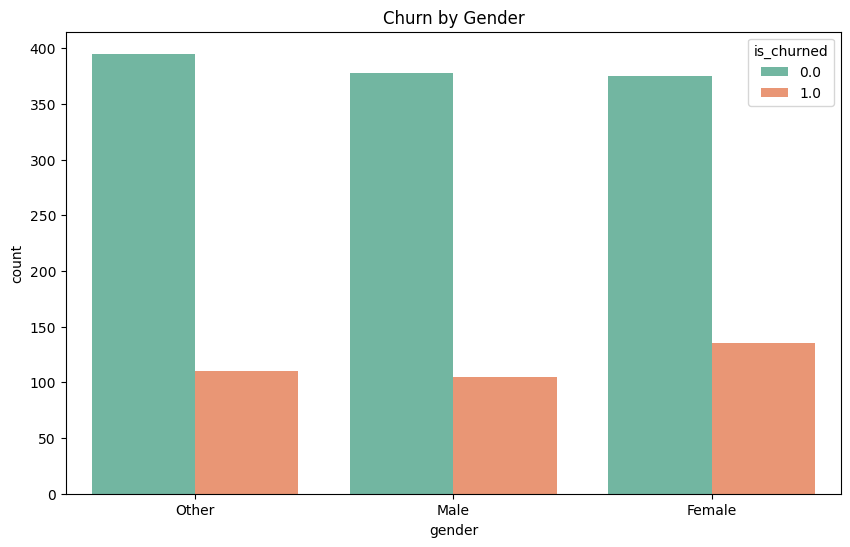

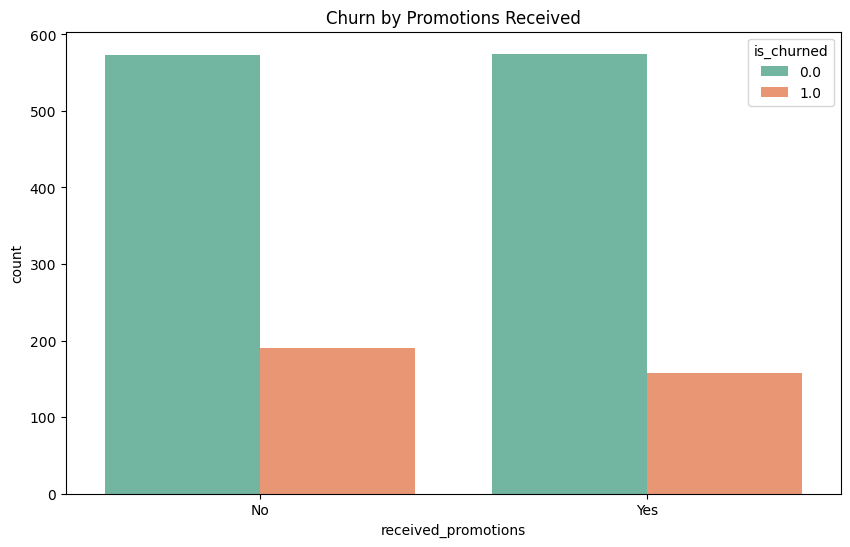

<ipython-input-215-197c6bbf1d8b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_churned', y='average_watch_hours', data=data, palette='pastel')


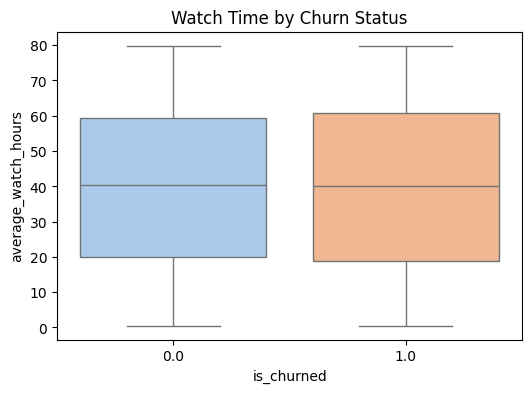

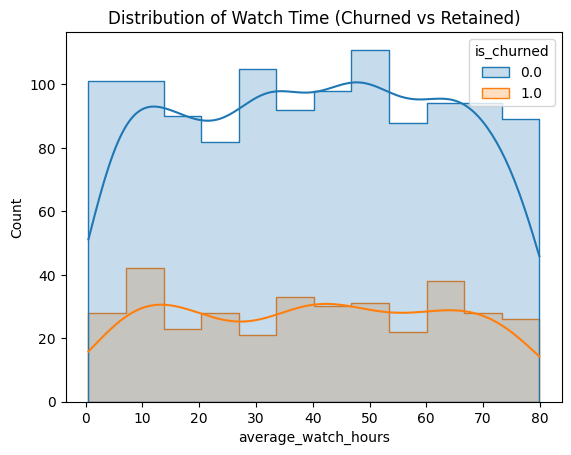

In [215]:
# Use charts (boxplots, bar plots, histograms) to visualise key differences between churned and active users
# Bar plot: churn by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_churned', data=data,palette='Set2')
plt.title("Churn by Gender")
plt.show()

# Bar plot: churn by promotions
plt.figure(figsize=(10, 6))
sns.countplot(x='received_promotions', hue='is_churned', data=data,palette='Set2')
plt.title("Churn by Promotions Received")
plt.show()

# Boxplot: watch hours vs churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='is_churned', y='average_watch_hours', data=data, palette='pastel')
plt.title("Watch Time by Churn Status")
plt.show()

# Histogram: watch hours distribution
sns.histplot(data, x='average_watch_hours', hue='is_churned', kde=True, element="step")
plt.title("Distribution of Watch Time (Churned vs Retained)")
plt.show()

Task 5. Predctive Modelling

*Logistic Regression*

In [236]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Remove rows where target is missing
data_clean = data.dropna(subset=['is_churned'])

# Prepare data for logistic regression
X = data_clean.drop(columns=['user_id', 'is_churned', 'signup_date', 'last_active_date'])
y = data_clean['is_churned']

# Original column lists
numerical_cols = ['age', 'monthly_fee', 'average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised']
categorical_cols = ['gender', 'country', 'subscription_type', 'received_promotions', 'referred_by_friend']

# Keep only columns that actually exist in X
numerical_cols = [col for col in numerical_cols if col in X.columns]
categorical_cols = [col for col in categorical_cols if col in X.columns]

# Preprocessing for numerical and categorical features
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numerical_cols),
    
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]), categorical_cols)
])

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Create model with pipeline with preprocessing and logistic regression
log_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Step 2: Train model
log_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

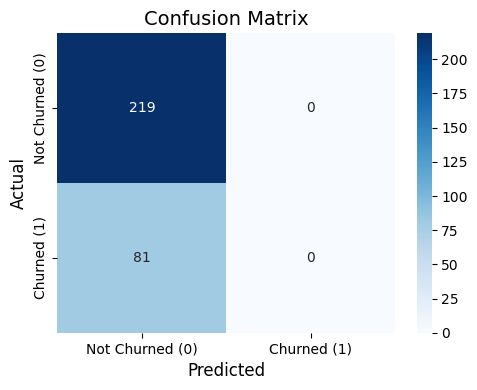

In [237]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned (0)', 'Churned (1)'],
            yticklabels=['Not Churned (0)', 'Churned (1)'])
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

In [238]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.000
Recall: 0.000
F1 Score: 0.000


In [239]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.730

Classification Report:


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84       219
         1.0       0.00      0.00      0.00        81

    accuracy                           0.73       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.53      0.73      0.62       300



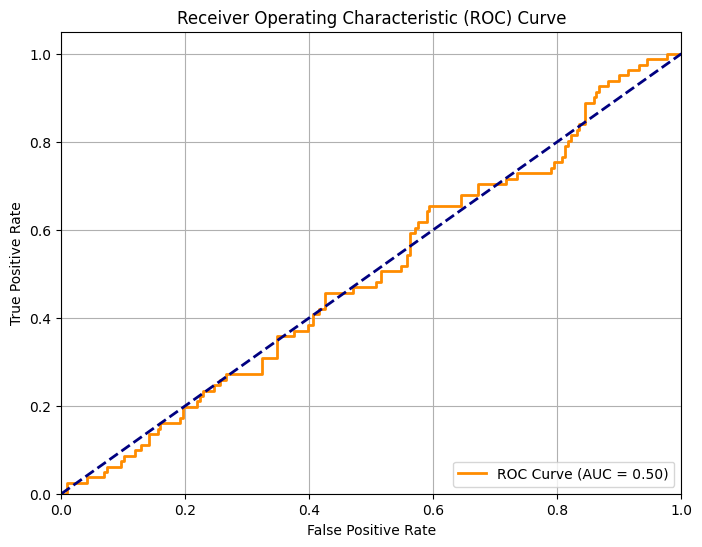

In [240]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
# y_pred_proba = log_model.predict_proba(X_test)[:, 1]

# 1. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 2. Compute AUC
roc_auc = auc(fpr, tpr)

# 3. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [241]:
# Interpret model coefficients and identify the most important predictors of churn from model coefficients
# Get feature names (numeric + one-hot encoded categorical)
feature_names = numerical_cols + list(
    log_model.named_steps['preprocessor']
             .named_transformers_['cat']
             .named_steps['onehot']
             .get_feature_names_out(categorical_cols)
)

# Get coefficients
coefficients = log_model.named_steps['classifier'].coef_[0]

# Create DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print top 10
print("Top predictors of churn:\n")
for i, row in coef_df.head(10).iterrows():
    direction = "increases churn" if row['Coefficient'] > 0 else "decreases churn"
    print(f"{row['Feature']}: {row['Coefficient']:.3f} ({direction})")

Top predictors of churn:

country_UK: 0.448 (increases churn)
country_France: 0.302 (increases churn)
referred_by_friend_Yes: -0.167 (decreases churn)
gender_Other: -0.165 (decreases churn)
gender_Male: -0.165 (decreases churn)
country_India: 0.158 (increases churn)
received_promotions_Yes: -0.126 (decreases churn)
country_Germany: 0.125 (increases churn)
age: 0.071 (increases churn)
monthly_fee: -0.047 (decreases churn)


*Linear Regression*

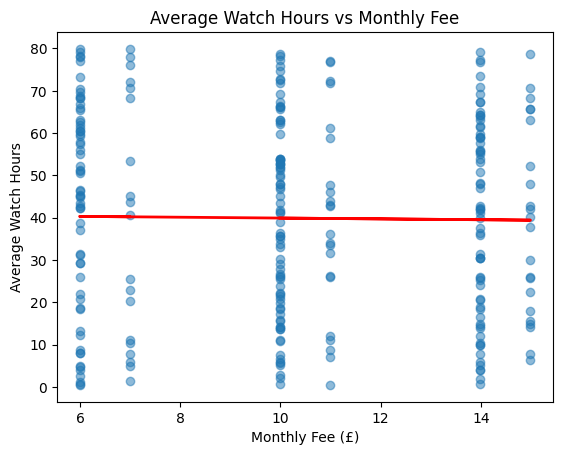

In [242]:
# Step 0: Handle missing values by dropping rows with NaN
data_clean = data[['monthly_fee', 'average_watch_hours']].dropna()

# Prepare data
X = data_clean[['monthly_fee']]
y = data_clean['average_watch_hours']

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Create model
lr_model = LinearRegression()

# Step 2: Train model
lr_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = lr_model.predict(X_test)

# Step 4: Visualize results
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Average Watch Hours vs Monthly Fee')
plt.xlabel('Monthly Fee (£)')
plt.ylabel('Average Watch Hours')
plt.show()

Text(0, 0.5, 'Average Watch Hours')

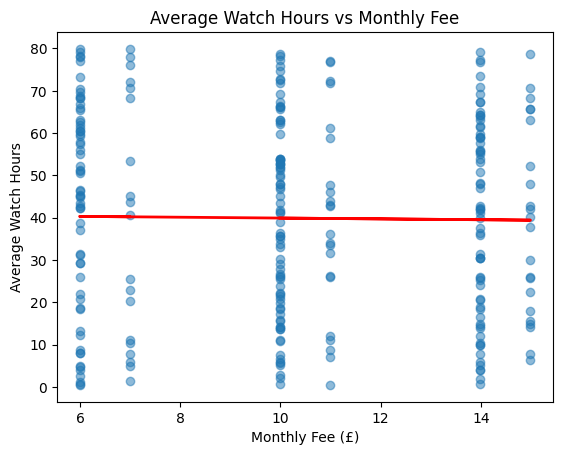

In [243]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Handle missing values
data_clean = data[['monthly_fee', 'average_watch_hours']].dropna()

# Prepare data for linear regression
X = data_clean[['monthly_fee']]
y = data_clean['average_watch_hours']

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Create model
lr_model = LinearRegression()

# Step 2: Train model
lr_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = lr_model.predict(X_test)

# Step 4: Visualize results
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Average Watch Hours vs Monthly Fee')
plt.xlabel('Monthly Fee (£)')
plt.ylabel('Average Watch Hours')

In [244]:
# Evaluate using: R2, RMSE, residual plots
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression Results:")
print(f"{'Coefficient':15s}: {lr_model.coef_[0]:.2f}") 
print(f"{'Intercept':15s}: £{lr_model.intercept_:8.2f}")
print(f"{'R² Score':15s}: {r2:.3f}")
print(f"{'RMSE':15s}: £ {rmse:.2f}")

Linear Regression Results:
Coefficient    : -0.10
Intercept      : £   40.92
R² Score       : 0.001
RMSE           : £ 23.28


In [245]:
# Interpret coefficients for business insights (e.g. impact of subscription type on watch hours)
print(f"Coefficient for Monthly Fee: {lr_model.coef_[0]:.2f}")
print("For each additional £1 in monthly subscription fee, the model predicts an average decrease of 0.10 hours in the user’s monthly watch time.")

Coefficient for Monthly Fee: -0.10
For each additional £1 in monthly subscription fee, the model predicts an average decrease of 0.10 hours in the user’s monthly watch time.
